# Storytelling con datos de las Naciones Unidas:

Este análisis tiene como objetivo explorar y visualizar el balance de pagos de distintos países, que es un registro contable de todas las transacciones económicas que realiza un país con el resto del mundo durante un período determinado. Incluye principalmente dos componentes: la cuenta corriente, que refleja el comercio de bienes y servicios, ingresos por inversiones y transferencias, y la cuenta de capital, que registra flujos financieros como préstamos, inversiones y adquisiciones de activos.

El propósito de este dashboard es visualizar de manera clara y dinámica estas transacciones para entender la posición económica internacional de cada país, identificar tendencias, comparaciones por año y por región, y destacar los países con balances más significativos. Esto permite una mejor interpretación de los flujos económicos globales y sus impactos financieros.

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('SYB67_125_202411_Balance of Payments.csv')
df.head()

,T15,Balance of payments summary,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2015,Balance of Payments: Current account (millions...,"-4,193",NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,1985,Balance of Payments: Capital account (millions...,0,NaN,"International Monetary Fund (IMF), Washington,..."


# Visualización y limpieza del dataset

In [41]:
df.describe()

,T15,Balance of payments summary,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,3315,3314,3315,3315,3315,22,3315
unique,204,203,8,4,2148,2,2
top,8,Albania,2015,Balance of Payments: Current account (millions...,0,"For statistical purposes, the data for China d...","International Monetary Fund (IMF), Washington,..."
freq,21,21,565,1124,217,21,3314


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   T15                          3315 non-null   object
 1   Balance of payments summary  3314 non-null   object
 2   Unnamed: 2                   3315 non-null   object
 3   Unnamed: 3                   3315 non-null   object
 4   Unnamed: 4                   3315 non-null   object
 5   Unnamed: 5                   22 non-null     object
 6   Unnamed: 6                   3315 non-null   object
dtypes: object(7)
memory usage: 181.4+ KB


In [43]:
# Renombrar columnas
df_clean = df.rename(columns={
    'Balance of payments summary': 'Country',
    'Unnamed: 2': 'Year',
    'Unnamed: 3': 'Account_Type',
    'Unnamed: 4': 'Value'
})

# Eliminar filas donde Value no es un número
df_clean = df_clean[df_clean['Value'].str.replace(',', '').str.replace('-', '').str.isnumeric() |
                    df_clean['Value'].str.contains('-')]

# Convertir Value a float
df_clean['Value'] = df_clean['Value'].replace(',', '', regex=True).astype(float)

# Filtrar solo cuentas relevantes
df_clean = df_clean[df_clean['Account_Type'].str.contains('Current account|Capital account|Financial account')]

# Revisar resultados
df_clean.head()

,T15,Country,Year,Account_Type,Value,Unnamed: 5,Unnamed: 6
1,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243.0,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578.0,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193.0,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,1985,Balance of Payments: Capital account (millions...,0.0,NaN,"International Monetary Fund (IMF), Washington,..."
5,4,Afghanistan,2010,Balance of Payments: Capital account (millions...,1897.0,NaN,"International Monetary Fund (IMF), Washington,..."


In [44]:
# Convertir en número la columna Year
df_clean['Year'] = df_clean['Year'].astype(int)

# Filtrado de cuentas y países relevantes

In [45]:
# Filtrar solo Current y Capital accounts
df_accounts = df_clean[df_clean['Account_Type'].str.contains('Current account|Capital account')]

# Seleccionar países clave
countries = ['Afghanistan', 'Brazil', 'Mexico', 'China', 'Germany']
df_accounts = df_accounts[df_accounts['Country'].isin(countries)]

# Revisar datos
df_accounts.head()

,T15,Country,Year,Account_Type,Value,Unnamed: 5,Unnamed: 6
1,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243.0,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578.0,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193.0,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,1985,Balance of Payments: Capital account (millions...,0.0,NaN,"International Monetary Fund (IMF), Washington,..."
5,4,Afghanistan,2010,Balance of Payments: Capital account (millions...,1897.0,NaN,"International Monetary Fund (IMF), Washington,..."


# Visualizaciones

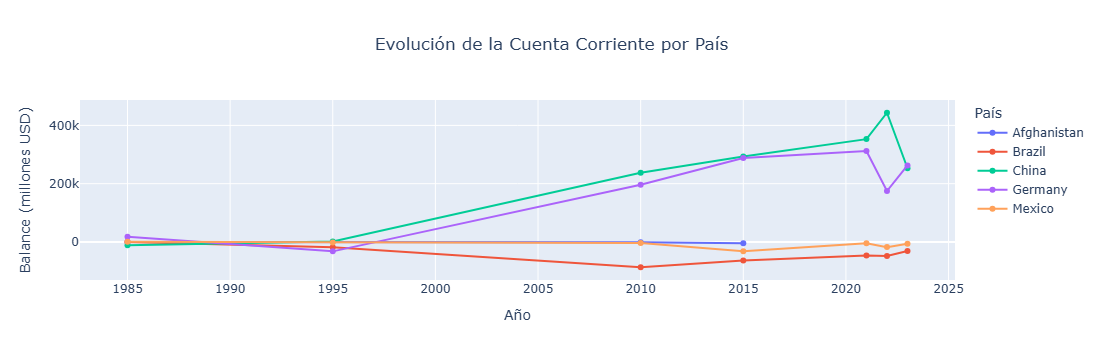

In [46]:
import plotly.express as px

# Filtrar Current account
df_current = df_accounts[df_accounts['Account_Type'].str.contains('Current account')]

# Gráfico de líneas interactivo
fig_line = px.line(
    df_current,
    x="Year",
    y="Value",
    color="Country",
    markers=True,
    title="Evolución de la Cuenta Corriente por País"
)

# Personalización
fig_line.update_layout(
    xaxis_title="Año",
    yaxis_title="Balance (millones USD)",
    legend_title="País",
    title_x=0.5
)

Este gráfico muestra la evolución del balance de la cuenta corriente de cada país a lo largo de los años. Permite comparar tendencias nacionales y observar cómo varía el flujo de pagos en el tiempo, ayudando a identificar periodos de superávit o déficit en la cuenta corriente de cada país.

### Principios aplicados:

* Gestalt (ley de proximidad y similitud): cada país tiene un color distinto para agrupar visualmente sus datos.

* Tufte (minimizar ruido): fondo blanco y cuadrícula ligera para centrar la atención en la información.

* Holmes (storytelling): se narra cómo cada país ha manejado déficit o superávit a lo largo del tiempo.

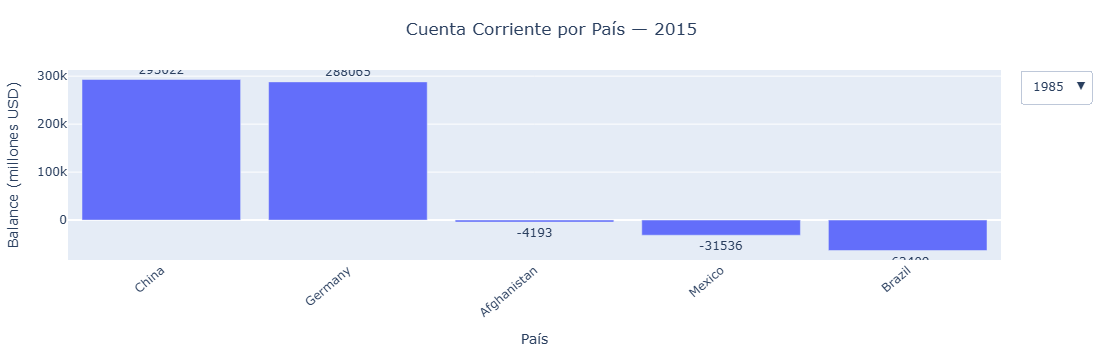

In [48]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

TOP_N = 20  # Países a mostrar por año

df_bar = df_accounts[df_accounts['Account_Type'].str.contains('Current account', na=False)].copy()

# Asegurar tipos correctos
df_bar['Year'] = pd.to_numeric(df_bar['Year'], errors='coerce').astype('Int64')
df_bar['Value'] = pd.to_numeric(df_bar['Value'], errors='coerce')
df_bar = df_bar.dropna(subset=['Country', 'Year', 'Value'])

# Añadir magnitud para ordenar por importancia
df_bar['Value_abs'] = df_bar['Value'].abs()

years = sorted(df_bar['Year'].dropna().unique())
initial_year = 2015 if 2015 in years else years[-1] 

fig = go.Figure()
visible_flags = []

for y in years:
    dff = df_bar[df_bar['Year'] == y].copy()
    # Top N por magnitud (absoluta) y orden descendente por valor
    dff = dff.nlargest(TOP_N, 'Value_abs').sort_values('Value', ascending=False)
    
    fig.add_trace(
        go.Bar(
            x=dff['Country'],
            y=dff['Value'],
            text=dff['Value'].round(0),
            textposition='outside',
            name=str(int(y)),
            hovertemplate="<b>%{x}</b><br>Año: " + str(int(y)) + "<br>Valor: %{y:.0f} M USD<extra></extra>",
            visible=(y == initial_year)
        )
    )
    visible_flags.append(y == initial_year)

# Dropdown
buttons = []
for i, y in enumerate(years):
    vis = [False] * len(years)
    vis[i] = True
    buttons.append(
        dict(
            label=str(int(y)),
            method="update",
            args=[
                {"visible": vis},
                {"title": f"Cuenta Corriente por País — {int(y)}"}
            ],
        )
    )

fig.update_layout(
    title=f"Cuenta Corriente por País — {int(initial_year)}",
    xaxis_title="País",
    yaxis_title="Balance (millones USD)",
    title_x=0.5,
    bargap=0.15,
    updatemenus=[dict(
        type="dropdown",
        x=1.02, y=1.0,
        xanchor="left", yanchor="top",
        buttons=buttons,
        showactive=True
    )],
    margin=dict(l=60, r=40, t=70, b=100),
)

# Rotación de etiquetas
fig.update_xaxes(tickangle= -40)
fig.update_yaxes(zeroline=True)

fig.show()

Este gráfico compara los países con los balances de cuenta corriente más significativos en un año específico. Facilita la comparación temporal de la cuenta corriente a nivel global, resaltando los años con mayores cambios o desequilibrios en los balances de pagos.

### Principios aplicados:

* Interactividad y narrativa (Holmes)

        - El dropdown permite al usuario explorar los datos por año, convirtiendo la visualización en una historia dinámica.

* Claridad y eficiencia visual (Tufte)

        - Se minimiza el “chartjunk” y se enfoca solo en los datos relevantes, maximizando la relación data-ink y facilitando la comparación.

* Organización perceptual (Gestalt)

        - Agrupación lógica y consistencia visual (proximidad, similitud y figura-fondo) para que el cerebro identifique patrones y relaciones rápidamente.

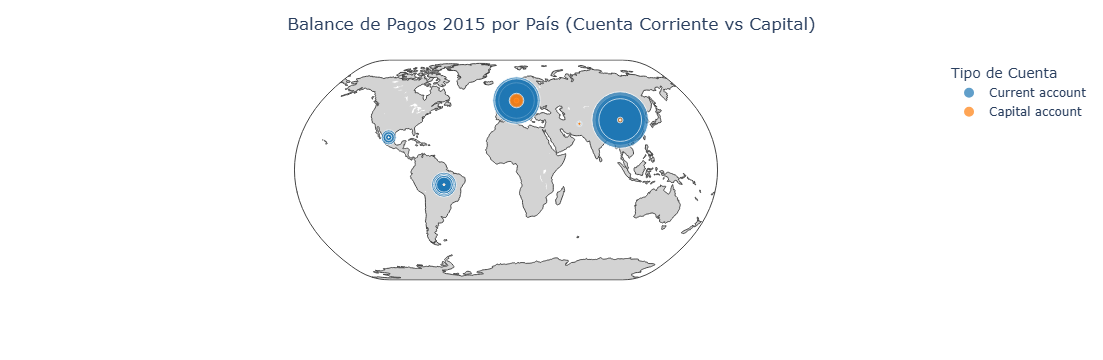

In [52]:
import plotly.express as px

# Copiar dataframe correcto
df_map = df_accounts.copy()

if 'Account_Short' not in df_map.columns:
    df_map['Account_Short'] = df_map['Account_Type'].apply(lambda x: 'Current account' if 'Current account' in x else 'Capital account')


# Crear columna de valor absoluto
df_map['Value_abs'] = df_map['Value'].abs()

# Crear gráfico
fig_map = px.scatter_geo(
    df_map,
    locations="Country",
    locationmode='country names',
    color="Account_Short",
    size="Value_abs",
    size_max=40,
    projection="natural earth",
    hover_name="Country",
    hover_data={"Value": True},
    color_discrete_map={
        "Current account": "#1f77b4",
        "Capital account": "#ff7f0e"
    }
)

fig_map.update_layout(
    title="Balance de Pagos 2015 por País (Cuenta Corriente vs Capital)",
    title_x=0.5,
    legend_title="Tipo de Cuenta",
    geo=dict(showcoastlines=True, showland=True, landcolor="lightgray")
)

fig_map.show()

Este mapa geográfico interactivo representa el balance de pagos de cada país para un año específico, diferenciando entre cuenta corriente y cuenta de capital mediante color y tamaño de burbuja proporcional al valor absoluto. Permite visualizar de manera inmediata qué países presentan superávit o déficit y comparar patrones regionales en un mismo vistazo.

### Principios de visualización aplicados:

* Gestalt: color y tamaño para diferenciar grupos y magnitudes.

* Tufte: eliminación de elementos innecesarios, solo datos y leyenda.

* Holmes: permite narrar historias de manera intuitiva y visual.

# Creación del Dashboard

In [53]:
!pip install dash

In [55]:
# Librerías
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Preparar DataFrame
df_map = df_accounts.copy()
if 'Account_Short' not in df_map.columns:
    df_map['Account_Short'] = df_map['Account_Type'].apply(
        lambda x: 'Current account' if 'Current account' in x else 'Capital account'
    )
df_map['Value_abs'] = df_map['Value'].abs()

# Inicializar app
app = dash.Dash(__name__)
app.title = "Dashboard Balance de Pagos"

# Layout
app.layout = html.Div([
    html.H1("Dashboard Balance de Pagos", style={'textAlign':'center', 'margin-bottom':'20px'}),

    # Sección de selección
    html.Div([
        html.Div([
            html.Label("Selecciona un país:", style={'font-weight':'bold'}),
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': c, 'value': c} for c in sorted(df_map['Country'].unique())],
                value='Afghanistan',
                clearable=False,
                style={'width':'100%'}
            )
        ], style={'width':'45%', 'display':'inline-block', 'padding':'10px'}),

        html.Div([
            html.Label("Selecciona un año:", style={'font-weight':'bold'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': y, 'value': y} for y in sorted(df_map['Year'].unique())],
                value=2015,
                clearable=False,
                style={'width':'100%'}
            )
        ], style={'width':'45%', 'display':'inline-block', 'padding':'10px'}),
    ], style={'display':'flex', 'justify-content':'space-around'}),

    # Gráficos
    dcc.Graph(id='line-graph', style={'margin-top':'30px'}),
    dcc.Graph(id='bar-graph', style={'margin-top':'30px'}),
    dcc.Graph(id='map-graph', style={'margin-top':'30px'})
])

# Callbacks
@app.callback(
    Output('line-graph', 'figure'),
    Input('country-dropdown', 'value')
)
def update_line(country_selected):
    df_line = df_map[(df_map['Country']==country_selected) & (df_map['Account_Short']=='Current account')]
    fig = px.line(
        df_line, x='Year', y='Value', markers=True,
        title=f"Evolución de la cuenta corriente - {country_selected}",
        labels={'Value':'Balance (millones USD)','Year':'Año'}
    )
    fig.update_layout(template='simple_white', title_x=0.5)
    return fig

@app.callback(
    Output('bar-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_bar(year_selected):
    df_bar = df_map[df_map['Year']==year_selected]
    fig = px.bar(
        df_bar, x='Country', y='Value', color='Account_Short',
        title=f"Balance de pagos por país - {year_selected}",
        labels={'Value':'Balance (millones USD)','Country':'País'},
        color_discrete_map={"Current account": "#1f77b4", "Capital account": "#ff7f0e"}
    )
    fig.update_layout(template='simple_white', title_x=0.5, xaxis_tickangle=-45)
    return fig

@app.callback(
    Output('map-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_map(year_selected):
    df_map_year = df_map[df_map['Year']==year_selected]
    fig = px.scatter_geo(
        df_map_year,
        locations="Country",
        locationmode='country names',
        color="Account_Short",
        size="Value_abs",
        size_max=35,
        projection="natural earth",
        hover_name="Country",
        hover_data={"Value": True},
        color_discrete_map={"Current account": "#1f77b4", "Capital account": "#ff7f0e"}
    )
    fig.update_layout(
        title=f"Balance de Pagos {year_selected} por País",
        title_x=0.5,
        legend_title="Tipo de Cuenta",
        geo=dict(showcoastlines=True, showland=True, landcolor="whitesmoke"),
        template='simple_white'
    )
    return fig

# Ejecutar
if __name__ == '__main__':
    app.run(debug=True)

Este dashboard interactivo del balance de pagos permite explorar y analizar los flujos económicos internacionales de manera visual y dinámica. Incluye tres componentes principales: un gráfico de líneas que muestra la evolución de la cuenta corriente por país a lo largo del tiempo, un gráfico de barras que compara los balances de los países más relevantes en un año seleccionado, y un mapa geográfico que ilustra la magnitud de los balances por país y tipo de cuenta. Gracias a los elementos interactivos como dropdowns y hover, los usuarios pueden filtrar, comparar y profundizar en la información, facilitando la comprensión de tendencias globales y la identificación de patrones económicos clave.